In [ ]:
!pip install opendatasets

In [5]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/fatihkgg/ecommerce-product-images-18k")

#USAR API TOKEN DO KAGGLE

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: marciamart
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fatihkgg/ecommerce-product-images-18k


100%|██████████| 142M/142M [00:01<00:00, 83.5MB/s]


Dataset em  /content/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES

In [8]:
data = '/content/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES'

# Parte 1

## Objetivo e informações esperadas

Objetivo:
* Apresentar informações do dataset.

Informações esperadas:
* Integridade dos Arquivos
  1. Verifique se todas as imagens listadas no arquivo de informações
realmente existem no diretório de imagens e vice-versa.
  2. Verifique se todas as imagens estão no mesmo formato, ex: JPEG,
PNG, etc.
* Consistência dos Metadados
  1. Verifique se há valores ausentes nos metadados e como esses casos
são tratados.
  2. Verifique valores inconsistentes, por exemplo: dimensões de imagens
fora do esperado.
* Qualidade das Imagens
  1. Identifique imagens corrompidas que não podem ser abertas ou
processadas.
* Distribuição das Classes
  1. Verifique a distribuição das classes para identificar possíveis
desequilíbrios que possam afetar a modelagem
* Duplicatas
  1. Identifique imagens duplicadas que possam enviesar os resultados.
  2. Verifique duplicatas no arquivo de informações.

Informações complementares:
* Elaborar uma apresentação para mostrar os resultados.
* Apresentar o dataset de forma detalhada.
* Verifique quais itens em Informações esperadas podem ser aplicados no
dataset.

## **Integridade dos Arquivos**
A função a seguir verifica se todas as imagens no diretório estão no mesmo formato (JPEG, JPG, PNG). Ela retorna um dicionário com os formatos das imagens como chaves e suas respectivas quantidades como valores.

Saída esperada: {'JPEG': 18175}

In [9]:
import os
from PIL import Image

def verificar_formato_imagem(data):
    formatos = {}
    for raiz, dirs, arquivos in os.walk(data):
        for arquivo in arquivos:
            if arquivo.endswith(('jpeg', 'jpg', 'png')):
                caminho_arquivo = os.path.join(raiz, arquivo)
                with Image.open(caminho_arquivo) as img:
                    formato = img.format
                    if formato not in formatos:
                        formatos[formato] = 0
                    formatos[formato] += 1
            else:
                formatos['Desconhecido'] = formatos.get('Desconhecido', 0) + 1

    return formatos

formatos_imagens = verificar_formato_imagem(data)
print(formatos_imagens)

{'JPEG': 18175}


## **Distribuição das Classes**
Conjuntos de treinamento (train) e validação (val) para treinamento de modelo e ajuste de hiperparâmetros. E uma pequena amostra, conjunto de verificação (check) para avaliação visual do modelo durante a implantação.

Aqui faremos uma análise da distribuição das imagens nessas classes.

#### **TRAIN**

Aqui contaremos quantas imagens possui em cada classe (diretórios)

In [37]:
import os
import pandas as pd

#análise da distribuição da classe: TRAIN
data =  '/content/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/train'
subdiretorios = {}
# Passando por cada subdiretório
for dirpath, dirnames, filenames in os.walk(data):
    if dirpath == data: continue

    num_images = 0
    # Conta o número de imagens no subdiretório
    for filename in filenames:
        if filename.lower().endswith('.jpeg'):
            num_images += 1

    # Imprimi o número de imagens do subdiretório atual
    print(f"São {num_images} imagens no diretório {os.path.basename(dirpath)}")
    subdiretorios[os.path.basename(dirpath)] = num_images

print(f"Subdiretórios: {subdiretorios}")

São 3978 imagens no diretório GROCERY
São 1235 imagens no diretório SPORTS_OUTDOOR
São 1715 imagens no diretório HOME_KITCHEN_TOOLS
São 1202 imagens no diretório BEAUTY_HEALTH
São 1353 imagens no diretório ELECTRONICS
São 1071 imagens no diretório CLOTHING_ACCESSORIES_JEWELLERY
São 1260 imagens no diretório PET_SUPPLIES
São 1087 imagens no diretório BABY_PRODUCTS
São 1091 imagens no diretório HOBBY_ARTS_STATIONERY
Subdiretórios: {'GROCERY': 3978, 'SPORTS_OUTDOOR': 1235, 'HOME_KITCHEN_TOOLS': 1715, 'BEAUTY_HEALTH': 1202, 'ELECTRONICS': 1353, 'CLOTHING_ACCESSORIES_JEWELLERY': 1071, 'PET_SUPPLIES': 1260, 'BABY_PRODUCTS': 1087, 'HOBBY_ARTS_STATIONERY': 1091}


Criando um gráfico de barras para visualização da distribuição das classes

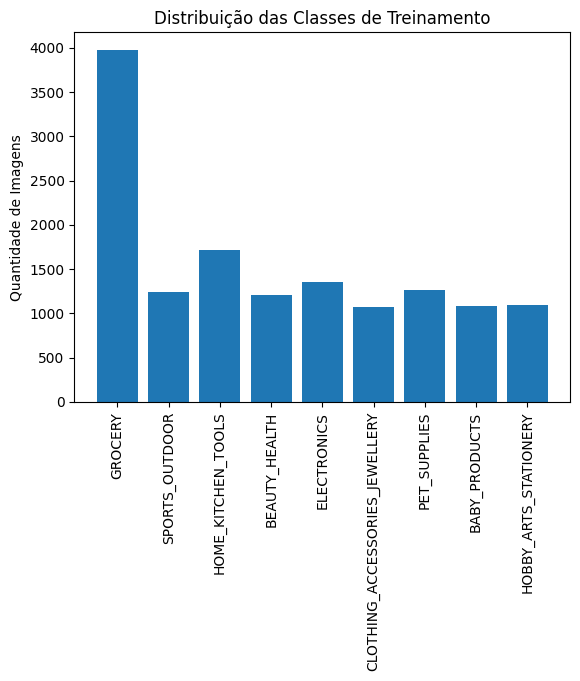

In [48]:
import matplotlib.pyplot as plt

plt.bar(subdiretorios.keys(), subdiretorios.values())
plt.xticks(rotation=90)
plt.ylabel("Quantidade de Imagens")
plt.title("Distribuição das Classes de Treinamento")
plt.show()

Com a análise podemos observar que a classe GROCERY possui significativamente mais instâncias em comparação com as demais classes, sugerindo um desequilíbrio considerável na distribuição das classes no conjunto de dados.

### **CHECK - VAL**
Faremos o mesmo para o conjunto de validação (val) e conjunto de verificação (check)

#### **VAL**

In [49]:
import os
import pandas as pd

#análise da distribuição da classe: TRAIN
data =  '/content/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/val'
subdiretorios = {}
# Passando por cada subdiretório
for dirpath, dirnames, filenames in os.walk(data):
    if dirpath == data: continue

    num_images = 0
    # Conta o número de imagens no subdiretório
    for filename in filenames:
        if filename.lower().endswith('.jpeg'):
            num_images += 1

    # Imprimi o número de imagens do subdiretório atual
    print(f"São {num_images} imagens no diretório {os.path.basename(dirpath)}")
    subdiretorios[os.path.basename(dirpath)] = num_images

print(f"Subdiretórios: {subdiretorios}")

São 1033 imagens no diretório GROCERY
São 321 imagens no diretório SPORTS_OUTDOOR
São 445 imagens no diretório HOME_KITCHEN_TOOLS
São 312 imagens no diretório BEAUTY_HEALTH
São 351 imagens no diretório ELECTRONICS
São 278 imagens no diretório CLOTHING_ACCESSORIES_JEWELLERY
São 327 imagens no diretório PET_SUPPLIES
São 282 imagens no diretório BABY_PRODUCTS
São 283 imagens no diretório HOBBY_ARTS_STATIONERY
Subdiretórios: {'GROCERY': 1033, 'SPORTS_OUTDOOR': 321, 'HOME_KITCHEN_TOOLS': 445, 'BEAUTY_HEALTH': 312, 'ELECTRONICS': 351, 'CLOTHING_ACCESSORIES_JEWELLERY': 278, 'PET_SUPPLIES': 327, 'BABY_PRODUCTS': 282, 'HOBBY_ARTS_STATIONERY': 283}


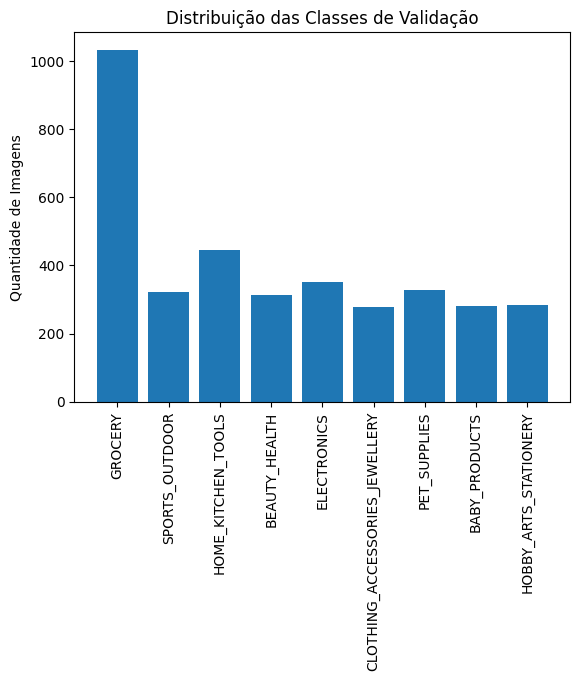

In [51]:
import matplotlib.pyplot as plt

plt.bar(subdiretorios.keys(), subdiretorios.values())
plt.xticks(rotation=90)
plt.ylabel("Quantidade de Imagens")
plt.title("Distribuição das Classes de Validação")
plt.show()

#### **CHECK**

In [52]:
import os
import pandas as pd

#análise da distribuição da classe: TRAIN
data =  '/content/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check'
subdiretorios = {}
# Passando por cada subdiretório
for dirpath, dirnames, filenames in os.walk(data):
    if dirpath == data: continue

    num_images = 0
    # Conta o número de imagens no subdiretório
    for filename in filenames:
        if filename.lower().endswith('.jpeg'):
            num_images += 1

    # Imprimi o número de imagens do subdiretório atual
    print(f"São {num_images} imagens no diretório {os.path.basename(dirpath)}")
    subdiretorios[os.path.basename(dirpath)] = num_images

print(f"Subdiretórios: {subdiretorios}")

São 155 imagens no diretório GROCERY
São 49 imagens no diretório SPORTS_OUTDOOR
São 68 imagens no diretório HOME_KITCHEN_TOOLS
São 48 imagens no diretório BEAUTY_HEALTH
São 53 imagens no diretório ELECTRONICS
São 42 imagens no diretório CLOTHING_ACCESSORIES_JEWELLERY
São 50 imagens no diretório PET_SUPPLIES
São 43 imagens no diretório BABY_PRODUCTS
São 43 imagens no diretório HOBBY_ARTS_STATIONERY
Subdiretórios: {'GROCERY': 155, 'SPORTS_OUTDOOR': 49, 'HOME_KITCHEN_TOOLS': 68, 'BEAUTY_HEALTH': 48, 'ELECTRONICS': 53, 'CLOTHING_ACCESSORIES_JEWELLERY': 42, 'PET_SUPPLIES': 50, 'BABY_PRODUCTS': 43, 'HOBBY_ARTS_STATIONERY': 43}


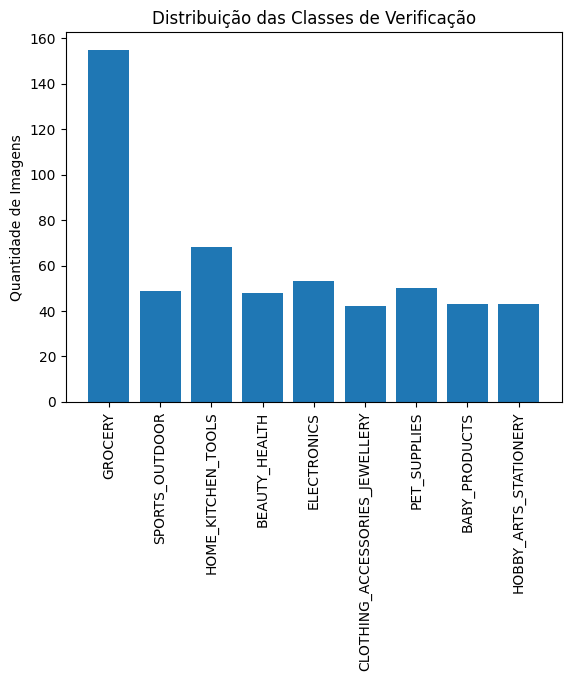

In [53]:
import matplotlib.pyplot as plt

plt.bar(subdiretorios.keys(), subdiretorios.values())
plt.xticks(rotation=90)
plt.ylabel("Quantidade de Imagens")
plt.title("Distribuição das Classes de Verificação")
plt.show()